In [19]:
import pandas as pd

df=pd.read_csv('/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/data/fraud.csv', index_col = 0)

# Check your data and define X and y : What is X and what is y? 
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values
df[['Class']].value_counts()

Class
0        21337
1          356
Name: count, dtype: int64

In [20]:
# perform train - test split. (40% as testing and 60% as training)
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split()

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)
# check the number of rows in the training and testing data
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 13015
Testing samples: 8678


Top 3 K values by AUC:
k = 19, Accuracy = 0.9956, AUC = 0.9462
k = 20, Accuracy = 0.9956, AUC = 0.9462
k = 17, Accuracy = 0.9957, AUC = 0.9427


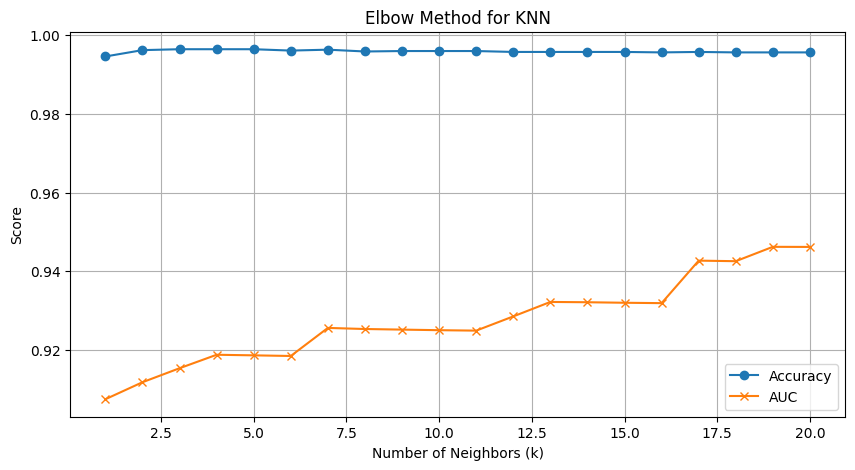

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

k_values = list(range(1, 21))
accuracies = []
aucs = []

for k in k_values:
    # Build pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    accuracies.append(acc)
    aucs.append(auc)

# Combine k, accuracy, and AUC into a list of tuples
results = list(zip(k_values, accuracies, aucs))

# Sort by AUC (3rd item in tuple), descending
sorted_by_auc = sorted(results, key=lambda x: x[2], reverse=True)

# Print top 3
print("Top 3 K values by AUC:")
for k, acc, auc in sorted_by_auc[:3]:
    print(f"k = {k}, Accuracy = {acc:.4f}, AUC = {auc:.4f}")

# Plot accuracy and AUC vs. k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.plot(k_values, aucs, marker='x', label='AUC')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Elbow Method for KNN')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1, 21))
accuracies = []
aucs = []
f1_scores = []

for k in k_values:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_fraud = report['1']['f1-score']  # F1-score for fraud class

    accuracies.append(acc)
    aucs.append(auc)
    f1_scores.append(f1_fraud)

# Print all results
print(f"{'k':>2} | {'Accuracy':>9} | {'AUC':>6} | {'F1-score (fraud)':>17}")
print("-" * 40)
for k, acc, auc, f1 in zip(k_values, accuracies, aucs, f1_scores):
    print(f"{k:>2} | {acc:.4f}    | {auc:.4f} | {f1:.4f}")


 k |  Accuracy |    AUC |  F1-score (fraud)
----------------------------------------
 1 | 0.9946    | 0.9075 | 0.8266
 2 | 0.9962    | 0.9118 | 0.8664
 3 | 0.9964    | 0.9153 | 0.8755
 4 | 0.9964    | 0.9188 | 0.8755
 5 | 0.9964    | 0.9186 | 0.8755
 6 | 0.9961    | 0.9185 | 0.8618
 7 | 0.9963    | 0.9256 | 0.8710
 8 | 0.9959    | 0.9253 | 0.8525
 9 | 0.9960    | 0.9252 | 0.8571
10 | 0.9960    | 0.9250 | 0.8571
11 | 0.9960    | 0.9249 | 0.8571
12 | 0.9957    | 0.9285 | 0.8477
13 | 0.9957    | 0.9322 | 0.8477
14 | 0.9957    | 0.9321 | 0.8477
15 | 0.9957    | 0.9320 | 0.8477
16 | 0.9956    | 0.9319 | 0.8430
17 | 0.9957    | 0.9427 | 0.8477
18 | 0.9956    | 0.9426 | 0.8430
19 | 0.9956    | 0.9462 | 0.8430
20 | 0.9956    | 0.9462 | 0.8417


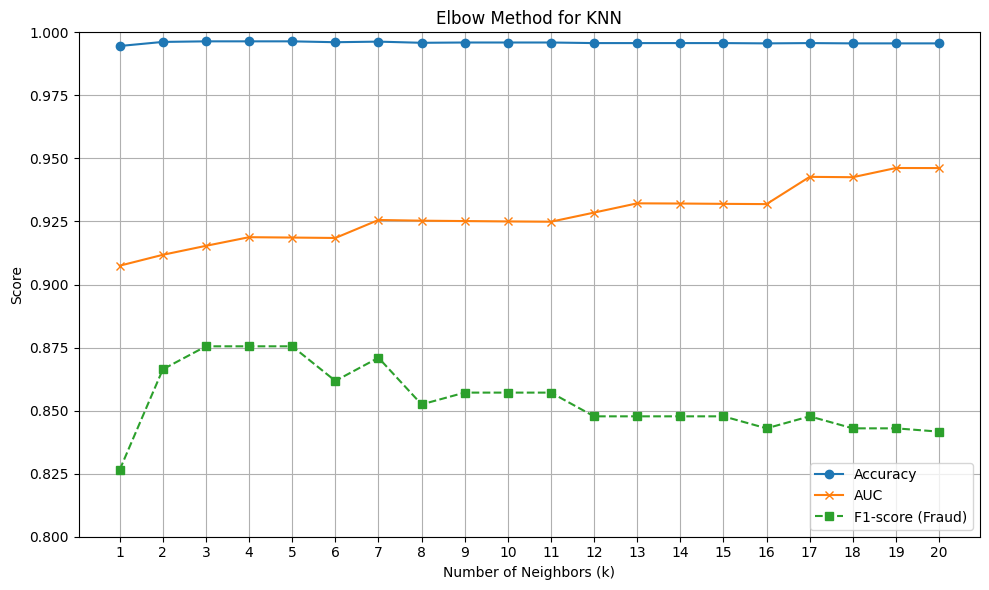

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.plot(k_values, aucs, marker='x', label='AUC')
plt.plot(k_values, f1_scores, marker='s', label='F1-score (Fraud)', linestyle='--')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Elbow Method for KNN')
plt.xticks(k_values)
plt.ylim(0.80, 1.00)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

# New split: 70% training, 30% testing
X_train70, X_test30, y_train70, y_test30 = train_test_split(X, y, test_size=0.30, random_state=1)

# Train the same pipeline
knn_pipeline.fit(X_train70, y_train70)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred30 = knn_pipeline.predict(X_test30)
print("Confusion Matrix:\n", confusion_matrix(y_test30, y_pred30))
print("\nClassification Report:\n", classification_report(y_test30, y_pred30))

y_proba30 = knn_pipeline.predict_proba(X_test30)
auc30 = roc_auc_score(y_test30, y_proba30[:, 1])
print("\nAUC:", auc30)


Confusion Matrix:
 [[6398    3]
 [  22   85]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6401
           1       0.97      0.79      0.87       107

    accuracy                           1.00      6508
   macro avg       0.98      0.90      0.93      6508
weighted avg       1.00      1.00      1.00      6508


AUC: 0.9287151394276887


In [13]:
#--------------------------------------------------
## ----------- K-NN Classifier ------------------## 
#--------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [('scaler', StandardScaler()),         
         ('knn', KNeighborsClassifier(n_neighbors = 5))]

knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


[[6398    3]
 [  22   85]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6401
           1       0.97      0.79      0.87       107

    accuracy                           1.00      6508
   macro avg       0.98      0.90      0.93      6508
weighted avg       1.00      1.00      1.00      6508

0.9287151394276887


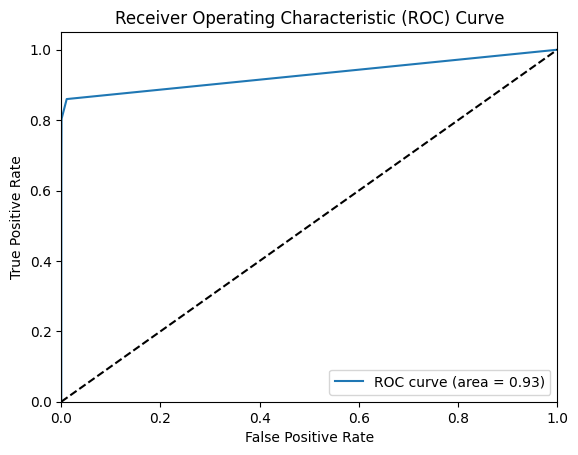

In [14]:
#--------------------------------------------------
## Model Evaluation ## 
#--------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)


fpr, tpr, thresholds = roc_curve(y_test, ypred_testP[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [5]:
ypred_train = knn_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = knn_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

[[12793     3]
 [   39   180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12796
           1       0.98      0.82      0.90       219

    accuracy                           1.00     13015
   macro avg       0.99      0.91      0.95     13015
weighted avg       1.00      1.00      1.00     13015

0.9992349207300798


In [6]:
import pandas as pd

df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'th': thresholds})
df

,fpr,tpr,th
0,0.000000,0.000000,inf
1,0.000117,0.613139,1.0
2,0.000351,0.773723,0.8
3,0.000351,0.795620,0.6
4,0.000585,0.810219,0.4
5,0.010420,0.839416,0.2
6,1.000000,1.000000,0.0
